In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.rc('font',family = 'NanumBarunGothic')

# **0. 데이터 준비 & EDA**

In [ ]:
df = pd.read_csv("./datasets/final2.csv",encoding ="euc-kr")
df.head(10)

,행정구,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,버섯전문점,...,폐업점포영업개월,10대 미만,10대,20 ~ 30대,40 ~ 50대,60대,70대 이상,총인구,역(전체),역(환승역)
0,강남구,301,79,3,65,37,340,7,3,0,...,51,33039,60155,147884,180804,61167,51939,534988,33,18
1,강동구,174,56,1,25,29,270,2,3,1,...,52,33211,39020,130022,147455,67493,47289,464490,12,2
2,강북구,102,56,4,22,13,213,4,3,0,...,52,13243,20362,78696,94561,47245,44515,298622,11,0
3,강서구,188,55,2,36,27,328,4,5,0,...,52,34702,43165,184028,173825,79738,60355,575813,23,8
4,관악구,146,48,1,27,18,252,0,5,0,...,54,19106,27057,204193,134898,60985,54511,500750,9,2
5,광진구,185,38,3,26,21,221,2,4,0,...,54,17359,25131,123028,106294,45120,34141,351073,11,4
6,구로구,163,45,0,13,19,280,5,6,1,...,54,25890,29422,119016,133415,60825,48002,416570,13,5
7,금천구,122,30,1,34,12,178,3,6,0,...,54,11848,14124,77606,76374,36827,27093,243872,4,2
8,노원구,136,45,0,20,16,307,3,3,0,...,53,29100,49687,133684,166527,71351,59337,509686,16,6
9,도봉구,95,40,2,41,13,184,2,6,0,...,53,15953,23787,79509,100618,51773,43244,314884,8,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 71 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   행정구             25 non-null     object 
 1   갈비/삼겹살          25 non-null     int64  
 2   곱창/양구이전문        25 non-null     int64  
 3   기사식당            25 non-null     int64  
 4   기타고기요리          25 non-null     int64  
 5   냉면집             25 non-null     int64  
 6   닭/오리요리          25 non-null     int64  
 7   돌솥/비빕밥전문점       25 non-null     int64  
 8   두부요리전문          25 non-null     int64  
 9   버섯전문점           25 non-null     int64  
 10  별식/퓨전요리         25 non-null     int64  
 11  보리밥전문           25 non-null     int64  
 12  부대찌개/섞어찌개       25 non-null     int64  
 13  부페              25 non-null     int64  
 14  분식              25 non-null     int64  
 15  설렁탕집            25 non-null     int64  
 16  순두부전문           25 non-null     int64  
 17  쌈밥전문            25 non-null     int64

- 총 71개의 컬럼, 25개의 데이터(행, 행정구 단위)
- 결측치는 존재하지 않는다.

c:\users\doroc\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

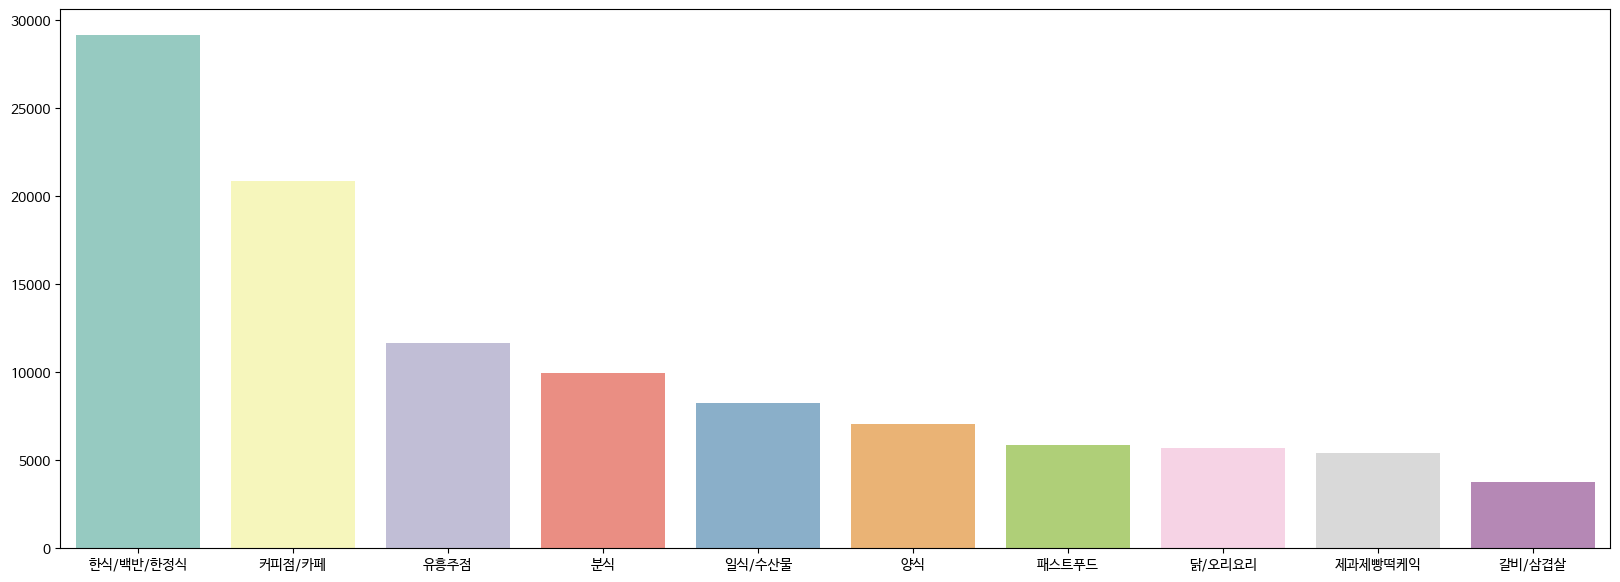

In [ ]:
### 34개의 업종 중 상위 10개 업종 파악

y = df.iloc[:,1:34].sum() # 점포 수 합계
y = y.sort_values(ascending = False).iloc[:10] # 상위 10개 업종 
x = list(pd.DataFrame(y).index) # 상위 10개 업종명

plt.figure(figsize = (20,7))
sns.barplot(x,y,palette = 'Set3')

In [ ]:
### 상위 10개의 업종만을 선택하여 데이터 저장
# np.enumerate(): 리스트를 순환하며 인덱스와 값을 함꼐 반환

cnt = df.iloc[:,1:34].sum() # 점포 수 합계
cnt = cnt.sort_values(ascending = False).iloc[:10] # 상위 10개 업종 
store = list(pd.DataFrame(cnt).index) # 상위 10개 업종명

cols = [i for i,x in enumerate(df.columns) if x in store] # 필요한 컬럼의 index
df = pd.concat([df.iloc[:,0], df.iloc[:,cols],df.iloc[:,34:]], axis = 1)
df.head()

,행정구,갈비/삼겹살,닭/오리요리,분식,양식,유흥주점,일식/수산물,제과제빵떡케익,커피점/카페,패스트푸드,...,폐업점포영업개월,10대 미만,10대,20 ~ 30대,40 ~ 50대,60대,70대 이상,총인구,역(전체),역(환승역)
0,강남구,301,340,751,1288,924,993,485,2191,548,...,51,33039,60155,147884,180804,61167,51939,534988,33,18
1,강동구,174,270,439,153,493,352,254,764,272,...,52,33211,39020,130022,147455,67493,47289,464490,12,2
2,강북구,102,213,312,94,424,193,140,384,152,...,52,13243,20362,78696,94561,47245,44515,298622,11,0
3,강서구,188,328,519,347,619,490,296,1134,322,...,52,34702,43165,184028,173825,79738,60355,575813,23,8
4,관악구,146,252,417,259,589,330,180,720,225,...,54,19106,27057,204193,134898,60985,54511,500750,9,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 48 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   행정구             25 non-null     object 
 1   갈비/삼겹살          25 non-null     int64  
 2   닭/오리요리          25 non-null     int64  
 3   분식              25 non-null     int64  
 4   양식              25 non-null     int64  
 5   유흥주점            25 non-null     int64  
 6   일식/수산물          25 non-null     int64  
 7   제과제빵떡케익         25 non-null     int64  
 8   커피점/카페          25 non-null     int64  
 9   패스트푸드           25 non-null     int64  
 10  한식/백반/한정식       25 non-null     int64  
 11  총생활인구수_평일       25 non-null     float64
 12  10대 미만 생활인구_평일  25 non-null     float64
 13  10대 생활인구_평일     25 non-null     float64
 14  20~30대 생활인구_평일  25 non-null     float64
 15  40~50대 생활인구_평일  25 non-null     float64
 16  60대 생활인구_평일     25 non-null     float64
 17  70대 이상 생활인구_평일  25 non-null     float

# **1. 필요한 데이터 선택**

In [ ]:
### 일식/수산물 업종만 선택

fish = pd.concat([df.iloc[:,0],df.iloc[:,6],df.iloc[:,11:]],axis = 1)
fish.head()

,행정구,일식/수산물,총생활인구수_평일,10대 미만 생활인구_평일,10대 생활인구_평일,20~30대 생활인구_평일,40~50대 생활인구_평일,60대 생활인구_평일,70대 이상 생활인구_평일,총생활인구수_주말,...,폐업점포영업개월,10대 미만,10대,20 ~ 30대,40 ~ 50대,60대,70대 이상,총인구,역(전체),역(환승역)
0,강남구,993,2.049828e+07,1.219102e+06,1.989315e+06,7.353311e+06,6.772562e+06,1.644169e+06,1.519817e+06,1.694812e+07,...,51,33039,60155,147884,180804,61167,51939,534988,33,18
1,강동구,352,1.181135e+07,1.002138e+06,1.215699e+06,3.062175e+06,3.721769e+06,1.422661e+06,1.386905e+06,1.206012e+07,...,52,33211,39020,130022,147455,67493,47289,464490,12,2
2,강북구,193,6.666287e+06,4.432063e+05,5.618048e+05,1.753008e+06,2.060718e+06,8.383629e+05,1.009187e+06,6.967055e+06,...,52,13243,20362,78696,94561,47245,44515,298622,11,0
3,강서구,490,1.285747e+07,1.006538e+06,1.045185e+06,4.138328e+06,3.929851e+06,1.365295e+06,1.372272e+06,1.278144e+07,...,52,34702,43165,184028,173825,79738,60355,575813,23,8
4,관악구,330,1.093507e+07,5.414203e+05,7.535122e+05,4.559442e+06,2.941770e+06,1.031023e+06,1.107899e+06,1.131414e+07,...,54,19106,27057,204193,134898,60985,54511,500750,9,2


In [ ]:
### 상관계수
# 각 변수들과 업소 수 간의 상관관계 파악

fish_corr = pd.DataFrame(fish.corr().iloc[0,1:])
fish_corr['절댓값'] = fish_corr.abs() # 상관계수 절댓값
fish_corr = fish_corr.sort_values(by = '절댓값',ascending = False).reset_index(drop = False)
fish_corr.columns = ['변수','상관계수','절댓값']
fish_corr

,변수,상관계수,절댓값
0,20~30대 생활인구_평일,0.912516,0.912516
1,40~50대 생활인구_평일,0.899652,0.899652
2,총생활인구수_평일,0.883918,0.883918
3,평균소득금액,0.844643,0.844643
4,20~30대 생활인구_주말,0.799532,0.799532
5,40~50대 생활인구_주말,0.785653,0.785653
6,총생활인구수_주말,0.779590,0.779590
7,역(전체),0.749985,0.749985
8,10대 생활인구_주말,0.744874,0.744874
9,10대 생활인구_평일,0.704537,0.704537


In [ ]:
### 강한 상관관계를 가진 변수 선택
# 상관계수의 절댓값이 0.7 이상인 변수만 선택

fish_variables = list(fish_corr.loc[fish_corr['절댓값'] >= 0.7,'변수'])
fish_variables

['20~30대 생활인구_평일',
 '40~50대 생활인구_평일',
 '총생활인구수_평일',
 '평균소득금액',
 '20~30대 생활인구_주말',
 '40~50대 생활인구_주말',
 '총생활인구수_주말',
 '역(전체)',
 '10대 생활인구_주말',
 '10대 생활인구_평일']

-  **10개**의 변수가 선택됨

In [ ]:
### 군집분석에 활용할 데이터 가공

df2 = fish.iloc[:, (i for i,x in enumerate(fish.columns) if x in fish_variables)]
df_fish = pd.concat([fish.iloc[:,0],df2],axis = 1)
df_fish.head()

,행정구,총생활인구수_평일,10대 생활인구_평일,20~30대 생활인구_평일,40~50대 생활인구_평일,총생활인구수_주말,10대 생활인구_주말,20~30대 생활인구_주말,40~50대 생활인구_주말,평균소득금액,역(전체)
0,강남구,2.049828e+07,1.989315e+06,7.353311e+06,6.772562e+06,1.694812e+07,2.040832e+06,5.402778e+06,5.467813e+06,12484.671288,33
1,강동구,1.181135e+07,1.215699e+06,3.062175e+06,3.721769e+06,1.206012e+07,1.185946e+06,3.253976e+06,3.853941e+06,6100.191842,12
2,강북구,6.666287e+06,5.618048e+05,1.753008e+06,2.060718e+06,6.967055e+06,5.672189e+05,1.905867e+06,2.177786e+06,3581.261923,11
3,강서구,1.285747e+07,1.045185e+06,4.138328e+06,3.929851e+06,1.278144e+07,1.035003e+06,4.177876e+06,3.849582e+06,5034.876000,23
4,관악구,1.093507e+07,7.535122e+05,4.559442e+06,2.941770e+06,1.131414e+07,7.223069e+05,4.828862e+06,3.050488e+06,5369.149682,9


In [ ]:
### 데이터 스케일링
# 데이터의 패턴이 결과에 직접적으로 영향을 미치는 비지도학습의 경우 데이터 스케일링이 선행되는 것이 권장된다.
# 피처 스케일링 방법 중 '표준화' 진행

from sklearn.preprocessing import StandardScaler

feature_df = df_fish.iloc[:,1:] # feature data

# 표준화
scaler = StandardScaler()
fish_std = pd.DataFrame(scaler.fit_transform(feature_df),columns = feature_df.columns)

# 결과 확인을 위해 행정구 컬럼 결합
fish_std = pd.concat([pd.DataFrame(df_fish['행정구']),fish_std],axis = 1)
fish_std.head(3) # 표준화된 데이터 확인

,행정구,총생활인구수_평일,10대 생활인구_평일,20~30대 생활인구_평일,40~50대 생활인구_평일,총생활인구수_주말,10대 생활인구_주말,20~30대 생활인구_주말,40~50대 생활인구_주말,평균소득금액,역(전체)
0,강남구,3.062619,2.712098,3.268715,3.181312,2.343754,2.824073,2.213155,2.483935,3.471040,2.580687
1,강동구,0.517866,0.829095,-0.182534,0.506621,0.773531,0.762698,0.127472,0.873712,0.379982,-0.577496
2,강북구,-0.989331,-0.762504,-1.235463,-0.949656,-0.862564,-0.729229,-1.181038,-0.798653,-0.839563,-0.727886


# **2. K-Means 군집화**

- 군집화에서 가장 대중적으로 사용되는 알고리즘
- 중심점(centroid)을 기준으로 가장 가까운 포인트들을 선택하는 기법

In [ ]:
from sklearn.cluster import KMeans

### **2-1. 군집 개수 정하기**
- 이너셔가 급격하게 감소하는 클러스터의 수를 모델의 적정 클러스터 수로 지정

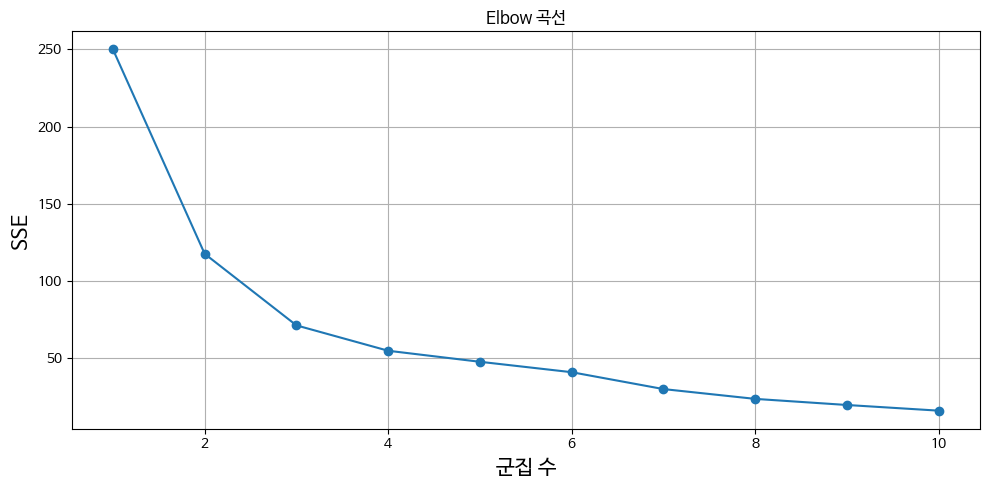

In [ ]:
### Inertia, Elbow 구하기

# 중심점 - 데이터 거리를 합산한 inertia(sse)를 빈 array로 생성
sse = []

# 반복문을 실행하며 군집의 개수가 1~11까지 kmeans를 실행 => sse array에 추가
for i in range(1, 11) :
    km = KMeans(n_clusters = i, # 군집화 할 개수
               init = 'k-means++', # 초기에 군집 중심점의 좌표를 설정할 방식
               n_init = 10,
               max_iter = 300, # 최대 반복 횟수
               random_state = 0)
    km.fit(fish_std.iloc[:,1:]) # '행정구' 컬럼 제거
    sse.append(km.inertia_)

# sse array 시각화   
plt.figure(figsize = (10,5))
plt.title('Elbow 곡선')
plt.plot(range(1,11), sse, marker = 'o')
plt.xlabel('군집 수',fontsize = 15)
plt.ylabel('SSE', fontsize = 15)
plt.tight_layout()
plt.grid()
plt.show()

- k = 4일 때 급격한 거리의 변화가 일어난 것으로 보아 클러스터 수로 **4개**가 적절해 보인다.

### **2-2. K-Means 군집화 수행**

In [ ]:
### 데이터를 4개의 그룹으로 군집화
# 군집화 시 행정구 컬럼은 필요 없으므로 제외

kmeans = KMeans(
    n_clusters = 4, 
    init = 'k-means++', 
    max_iter = 300, 
    random_state = 0)
kmeans.fit(fish_std.iloc[:,1:])

KMeans(n_clusters=4, random_state=0)

In [ ]:
### 각 행정구가 어느 군집화 중심에 속하는지 확인

fish_std['cluster'] = kmeans.labels_ # 군집화 컬럼 추가
print(kmeans.labels_)
print()
print(len(kmeans.labels_))

[0 2 3 2 2 1 1 3 2 3 1 1 2 1 2 1 1 0 1 2 3 1 3 3 1]

25


In [ ]:
### 군집화 결과 확인

df_result = fish_std.groupby(['cluster'])['행정구'].count()
print(df_result)

cluster
0     2
1    10
2     7
3     6
Name: 행정구, dtype: int64


In [ ]:
### 차원 축소
# 평면에 시각화를 위해 PCA를 통해 10개의 속성을 2개로 차원 축소
# 이후 X좌표, Y좌표로 개별 데이터를 표현

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_transformed = pca.fit_transform(fish_std.iloc[:,1:11])

fish_std['pca_x'] = pca_transformed[:,0]
fish_std['pca_y'] = pca_transformed[:,1]
fish_std.head(3)

,행정구,총생활인구수_평일,10대 생활인구_평일,20~30대 생활인구_평일,40~50대 생활인구_평일,총생활인구수_주말,10대 생활인구_주말,20~30대 생활인구_주말,40~50대 생활인구_주말,평균소득금액,역(전체),cluster,pca_x,pca_y
0,강남구,3.062619,2.712098,3.268715,3.181312,2.343754,2.824073,2.213155,2.483935,3.471040,2.580687,0,8.850706,0.982547
1,강동구,0.517866,0.829095,-0.182534,0.506621,0.773531,0.762698,0.127472,0.873712,0.379982,-0.577496,2,1.361890,-1.223973
2,강북구,-0.989331,-0.762504,-1.235463,-0.949656,-0.862564,-0.729229,-1.181038,-0.798653,-0.839563,-0.727886,3,-2.872108,-0.349406


c:\users\doroc\appdata\local\programs\python\python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


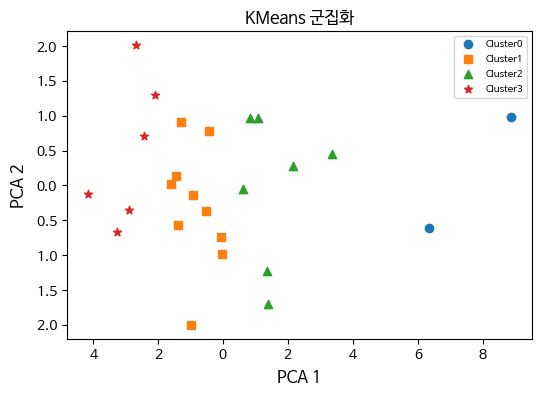

In [ ]:
### 군집별 산점도 출력

# 군집 값이 0, 1, 2,3인 경우마다 별도의 인덱스로 추출
marker0_ind = fish_std[fish_std['cluster'] == 0].index
marker1_ind = fish_std[fish_std['cluster'] == 1].index
marker2_ind = fish_std[fish_std['cluster'] == 2].index
marker3_ind = fish_std[fish_std['cluster'] == 3].index

# 군집 값 0, 1, 2, 3에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. 마커 표시
plt.figure(figsize = (6,4))

plt.scatter(x = fish_std.loc[marker0_ind,'pca_x'],y = fish_std.loc[marker0_ind,'pca_y'],marker='o')
plt.scatter(x = fish_std.loc[marker1_ind,'pca_x'],y = fish_std.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x = fish_std.loc[marker2_ind,'pca_x'],y = fish_std.loc[marker2_ind,'pca_y'], marker='^')
plt.scatter(x = fish_std.loc[marker3_ind,'pca_x'],y = fish_std.loc[marker3_ind,'pca_y'], marker='*')

plt.legend(['Cluster0','Cluster1','Cluster2','Cluster3'],fontsize = 7)
plt.xlabel('PCA 1',size = 12)
plt.ylabel('PCA 2',size = 12)
plt.title('KMeans 군집화')
plt.show()

In [ ]:
### 각 군집에 해당하는 행정구 확인하기

group0 = list(fish_std.loc[fish_std['cluster'] == 0,'행정구'])
print("군집0: "+ str(group0))

group1 = list(fish_std.loc[fish_std['cluster'] == 1,'행정구'])
print("군집1: "+ str(group1))

group2 = list(fish_std.loc[fish_std['cluster'] == 2,'행정구'])
print("군집2: "+ str(group2))

group3 = list(fish_std.loc[fish_std['cluster'] == 3,'행정구'])
print("군집3: "+ str(group3))

군집0: ['강남구', '송파구']
군집1: ['광진구', '구로구', '동대문구', '동작구', '서대문구', '성동구', '성북구', '양천구', '은평구', '중랑구']
군집2: ['강동구', '강서구', '관악구', '노원구', '마포구', '서초구', '영등포구']
군집3: ['강북구', '금천구', '도봉구', '용산구', '종로구', '중구']


### **2-3. 군집화 평가**

### **a) 실루엣 계수**
- 값이 **높을수록** 최적화된 군집이다. (**0.5 이상**을 권장)

In [ ]:
### 실루엣 분석을 위한 API 추가

from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
### 모든 개별 데이터에 대해 실루엣 계수 값 구하기

score_samples = silhouette_samples(fish_std.iloc[:,1:11],fish_std['cluster'])
print('silhouette_samples() return 값의 shape', score_samples.shape)

silhouette_samples() return 값의 shape (25,)


In [ ]:
### 모든 데이터의 평균 실루엣 계수값 구하기

average_score = silhouette_score(fish_std.iloc[:,1:11],fish_std['cluster'])
print("실루엣 분석 점수: {0:.3f}".format(average_score))

실루엣 분석 점수: 0.272


In [ ]:
### 실루엣 계수 컬럼 추가

fish_std['silhouette_coef'] = score_samples
fish_std.head(3)

,행정구,총생활인구수_평일,10대 생활인구_평일,20~30대 생활인구_평일,40~50대 생활인구_평일,총생활인구수_주말,10대 생활인구_주말,20~30대 생활인구_주말,40~50대 생활인구_주말,평균소득금액,역(전체),cluster,pca_x,pca_y,silhouette_coef
0,강남구,3.062619,2.712098,3.268715,3.181312,2.343754,2.824073,2.213155,2.483935,3.471040,2.580687,0,8.850706,0.982547,0.536743
1,강동구,0.517866,0.829095,-0.182534,0.506621,0.773531,0.762698,0.127472,0.873712,0.379982,-0.577496,2,1.361890,-1.223973,0.085934
2,강북구,-0.989331,-0.762504,-1.235463,-0.949656,-0.862564,-0.729229,-1.181038,-0.798653,-0.839563,-0.727886,3,-2.872108,-0.349406,0.310821


In [ ]:
### 군집별로 실루엣 계수의 평균값 구하기

fish_std.groupby('cluster')['silhouette_coef'].mean()

cluster
0    0.423301
1    0.322298
2    0.123943
3    0.310530
Name: silhouette_coef, dtype: float64

- 군집1이 다른 군집들에 비해 상대적으로 평균값이 낮다.
- 전체 실루엣 계수의 평균값이 낮은 편이고, 군집2의 실루엣 계수가 다른 군집들에 비해 상대적으로 낮기에 좋은 군집화 조건이라 보기는 다소 어렵다.

### **b) Davies Bouldin Index**
- 값이 **낮을수록** 최적화된 군집

In [ ]:
### Davies Bouldin Index 계산을 위한 API 추가

from sklearn.metrics import davies_bouldin_score

In [ ]:
### Davies Bouldin Index 값 구하기

dbi = davies_bouldin_score(fish_std.iloc[:,1:11],fish_std['cluster'])
print("Davies Bouldin Index: {0:.3f}".format(dbi))

Davies Bouldin Index: 1.007


# **3. 평균 이동(Mean Shift)**
- 데이터의 분포도로 군집 중심점 탐색 -> 확률밀도함수 -> KDE(Kernel Density Estimation)  
1) 개별 데이터의 특정 반경 내에 주변 데이터를 포함한 데이터 분포도를 KDE 기반 평균 이동 알고리즘으로 계산  
2) 데이터 분포도가 높은 방향으로 데이터 이동  
3) 모든 데이터들이 1), 2)를 수행하면서 이동하면 개별 데이터들이 군집 중심점으로 모임  
4) 지정된 반복 횟수만큼 전체 데이터에 대해 KDE 기반 군집화 수행  
5) 개별 데이터들이 모인 중심점을 군집 중심점으로 결정

- 장점
    - 데이터 세트의 형태를 특정 형태나 특정 분포도 기반 모델로 가정x => 유연한 군집화
    - 이상치의 영향력이 크지 x
    - 미리 군집 개수를 정할 필요가 없음
- 단점
    - 알고리즘 수행 시간이 오래 걸림
    - 대역폭에 따라 군집화 성능이 좌우됨


### **3-1. 평균 이동 군집화 수행**

In [ ]:
### 필요한 라이브러리 import

from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

In [ ]:
### 데이터 다시 준비

feature_df = df_fish.iloc[:,1:]

scaler = StandardScaler()
fish_std = pd.DataFrame(scaler.fit_transform(feature_df),columns = feature_df.columns)

# 결과 확인을 위해 행정구 컬럼 결합하기
fish_std = pd.concat([pd.DataFrame(df_fish['행정구']),fish_std],axis = 1)
fish_std.head(3)

,행정구,총생활인구수_평일,10대 생활인구_평일,20~30대 생활인구_평일,40~50대 생활인구_평일,총생활인구수_주말,10대 생활인구_주말,20~30대 생활인구_주말,40~50대 생활인구_주말,평균소득금액,역(전체)
0,강남구,3.062619,2.712098,3.268715,3.181312,2.343754,2.824073,2.213155,2.483935,3.471040,2.580687
1,강동구,0.517866,0.829095,-0.182534,0.506621,0.773531,0.762698,0.127472,0.873712,0.379982,-0.577496
2,강북구,-0.989331,-0.762504,-1.235463,-0.949656,-0.862564,-0.729229,-1.181038,-0.798653,-0.839563,-0.727886


In [ ]:
### 최적 대역폭 계산
# estimate_bandwidth(feature_data): 최적화된 bandwidth를 찾기 위한 함수
# 군집화 시 '행정구'는 필요 없으므로 제외

h = estimate_bandwidth(fish_std.iloc[:,1:])
print('bandwidth 값: ',round(h,3))

bandwidth 값:  2.528


In [ ]:
### 평균 이동 군집화 수헹

ms = MeanShift(bandwidth = h)
cluster_labels = ms.fit_predict(fish_std.iloc[:,1:])
print('cluster labels 유형: ',np.unique(cluster_labels))

cluster labels 유형:  [0 1 2 3]


- **4개**의 군집으로 분류되는 것을 확인할 수 있다.

In [ ]:
### 각 행정구가 어느 군집에 속하는지 확인

fish_std['cluster'] = cluster_labels
print(cluster_labels)
print()
print(len(cluster_labels))

[1 0 0 3 0 0 0 0 0 0 0 0 0 0 3 0 0 2 0 0 0 0 0 0 0]

25


In [ ]:
### 군집화 결과 확인

df_result = fish_std.groupby(['cluster'])['행정구'].count()
print(df_result)

cluster
0    21
1     1
2     1
3     2
Name: 행정구, dtype: int64


In [ ]:
### 차원 축소
# PCA를 이용해 10개의 속성을 2개로 차원 축소
# 이후 X좌표, Y좌표로 개별 데이터를 표현

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_transformed = pca.fit_transform(fish_std.iloc[:,1:11])

fish_std['pca_x'] = pca_transformed[:,0]
fish_std['pca_y'] = pca_transformed[:,1]
fish_std.head(3)

,행정구,총생활인구수_평일,10대 생활인구_평일,20~30대 생활인구_평일,40~50대 생활인구_평일,총생활인구수_주말,10대 생활인구_주말,20~30대 생활인구_주말,40~50대 생활인구_주말,평균소득금액,역(전체),cluster,pca_x,pca_y
0,강남구,3.062619,2.712098,3.268715,3.181312,2.343754,2.824073,2.213155,2.483935,3.471040,2.580687,1,8.850706,0.982547
1,강동구,0.517866,0.829095,-0.182534,0.506621,0.773531,0.762698,0.127472,0.873712,0.379982,-0.577496,0,1.361890,-1.223973
2,강북구,-0.989331,-0.762504,-1.235463,-0.949656,-0.862564,-0.729229,-1.181038,-0.798653,-0.839563,-0.727886,0,-2.872108,-0.349406


c:\users\doroc\appdata\local\programs\python\python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


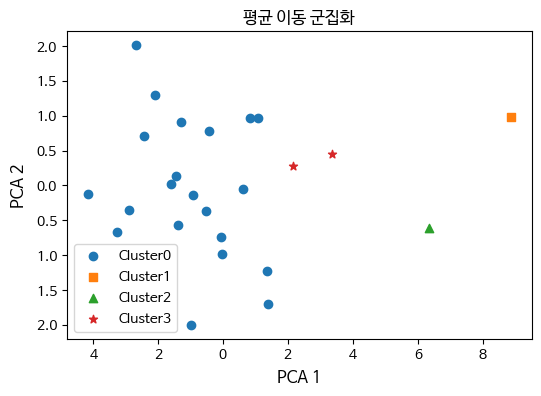

In [ ]:
### 군집별 산점도 출력

# 군집 값이 0, 1, 2,3인 경우마다 별도의 인덱스로 추출
marker0_ind = fish_std[fish_std['cluster'] == 0].index
marker1_ind = fish_std[fish_std['cluster'] == 1].index
marker2_ind = fish_std[fish_std['cluster'] == 2].index
marker3_ind = fish_std[fish_std['cluster'] == 3].index

# 군집 값 0, 1, 2, 3에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. 마커 표시
plt.figure(figsize = (6,4))

plt.scatter(x = fish_std.loc[marker0_ind,'pca_x'],y = fish_std.loc[marker0_ind,'pca_y'],marker='o')
plt.scatter(x = fish_std.loc[marker1_ind,'pca_x'],y = fish_std.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x = fish_std.loc[marker2_ind,'pca_x'],y = fish_std.loc[marker2_ind,'pca_y'], marker='^')
plt.scatter(x = fish_std.loc[marker3_ind,'pca_x'],y = fish_std.loc[marker3_ind,'pca_y'], marker='*')

plt.legend(['Cluster0','Cluster1','Cluster2','Cluster3'],fontsize = 10)
plt.xlabel('PCA 1',size = 12)
plt.ylabel('PCA 2',size = 12)
plt.title('평균 이동 군집화')
plt.show()

In [ ]:
### 각 군집에 해당하는 행정구 확인하기

group0 = list(fish_std.loc[fish_std['cluster'] == 0,'행정구'])
print("군집0: "+ str(group0))

group1 = list(fish_std.loc[fish_std['cluster'] == 1,'행정구'])
print("군집1: "+ str(group1))

group2 = list(fish_std.loc[fish_std['cluster'] == 2,'행정구'])
print("군집2: "+ str(group2))

group3 = list(fish_std.loc[fish_std['cluster'] == 3,'행정구'])
print("군집3: "+ str(group3))

군집0: ['강동구', '강북구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '성동구', '성북구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']
군집1: ['강남구']
군집2: ['송파구']
군집3: ['강서구', '서초구']


### **3-2. 군집화 평가**

### **a) 실루엣 계수**

In [ ]:
### 모든 개별 데이터에 실루엣 계수값 구하기
score_samples = silhouette_samples(fish_std.iloc[:,1:11],fish_std['cluster'])

### 모든 데이터의 평균 실루엣 계수값 구하기
average_score = silhouette_score(fish_std.iloc[:,1:11],fish_std['cluster'])
print("실루엣 분석 점수: {0:.3f}".format(average_score))

### 실루엣 계수 컬럼 추가
fish_std['silhouette_coef'] = score_samples

### 군집별로 실루엣 계수의 평균값 구하기
fish_std.groupby('cluster')['silhouette_coef'].mean()

실루엣 분석 점수: 0.287


cluster
0    0.321705
1    0.000000
2    0.000000
3    0.204197
Name: silhouette_coef, dtype: float64

- 군집2,3이 다른 군집들에 비해 상대적으로 평균값이 낮다.(낮은 수준이 아니고 0이다.)
- 전체 실루엣 계수의 평균값이 낮고, 특정 군집의 실루엣 계수가 0이기에, 좋은 군집화 결과라고 보기 힘들다.

### **b) Davies Bouldin Index**

In [ ]:
### Davies Bouldin Index 값 구하기

dbi = davies_bouldin_score(fish_std.iloc[:,1:11],fish_std['cluster'])
print("Davies Bouldin Index: {0:.3f}".format(dbi))

Davies Bouldin Index: 0.605


# **4. 병합 군집(Agglomerative Clustering)**

### **✔ 병합 군집**
- 각각의 데이터 포인트를 하나의 클러스터로 지정하고 지정된 개수의 클러스터가 남을 때까지 가장 비슷한 두 클러스터를 합쳐 나가는 알고리즘
- 작은 클러스터들이 모여 큰 클러스터를 이루는 계층적 구조
- linkage 옵션
    - 1) **ward**: 모든 클러스터 내의 분산을 가장 적게 증가시키는 두 클러스터를 합치는 방식
    - 2) **average**: 포인트 사이의 평균 거리가 가장 짧은 두 클러스터를 합치는 방식
    - 3) **complete**: 포인트 사이의 최대 거리가 가장 짧은 두 클러스터를 합치는 방식
    - 4) **single**: 포인트 사이의 최소 거리가 가장 짧은 두 클러스터를 합치는 방식

### **✔ 계층적 군집(Hierarchical Clustering)**
- 계층적 트리 모형을 이용하여 군집화 수행
- 개별 데이터 포인트의 순차적, 계층적으로 유사한 클러스터로 통합
- 병합 군집은 계층적 군집을 형성함
    - 병합 군집의 경우 **상향식** 군집화 방식
- **덴드로그램(dendrogram)**을 활용하여 계층 군집을 시각화할 수 있음
    - 덴드로그램에서 데이터 포인트는 맨 아래 나타남
    - 가지의 길이는 합쳐진 클러스터가 얼마나 **멀리** 떨어져 있는지를 보여줌

In [ ]:
### 데이터 다시 준비

feature_df = df_fish.iloc[:,1:]

scaler = StandardScaler()
fish_std = pd.DataFrame(scaler.fit_transform(feature_df),columns = feature_df.columns)

# 결과 확인을 위해 행정구 컬럼 결합하기
fish_std = pd.concat([pd.DataFrame(df_fish['행정구']),fish_std],axis = 1)
fish_std.head(3)

,행정구,총생활인구수_평일,10대 생활인구_평일,20~30대 생활인구_평일,40~50대 생활인구_평일,총생활인구수_주말,10대 생활인구_주말,20~30대 생활인구_주말,40~50대 생활인구_주말,평균소득금액,역(전체)
0,강남구,3.062619,2.712098,3.268715,3.181312,2.343754,2.824073,2.213155,2.483935,3.471040,2.580687
1,강동구,0.517866,0.829095,-0.182534,0.506621,0.773531,0.762698,0.127472,0.873712,0.379982,-0.577496
2,강북구,-0.989331,-0.762504,-1.235463,-0.949656,-0.862564,-0.729229,-1.181038,-0.798653,-0.839563,-0.727886


### **4-1. 여러 클러스터 병합 방식 적용하기**
- 4가지 병합 방식을 모두 적용
- 각각의 결과를 덴드로그램으로 시각화

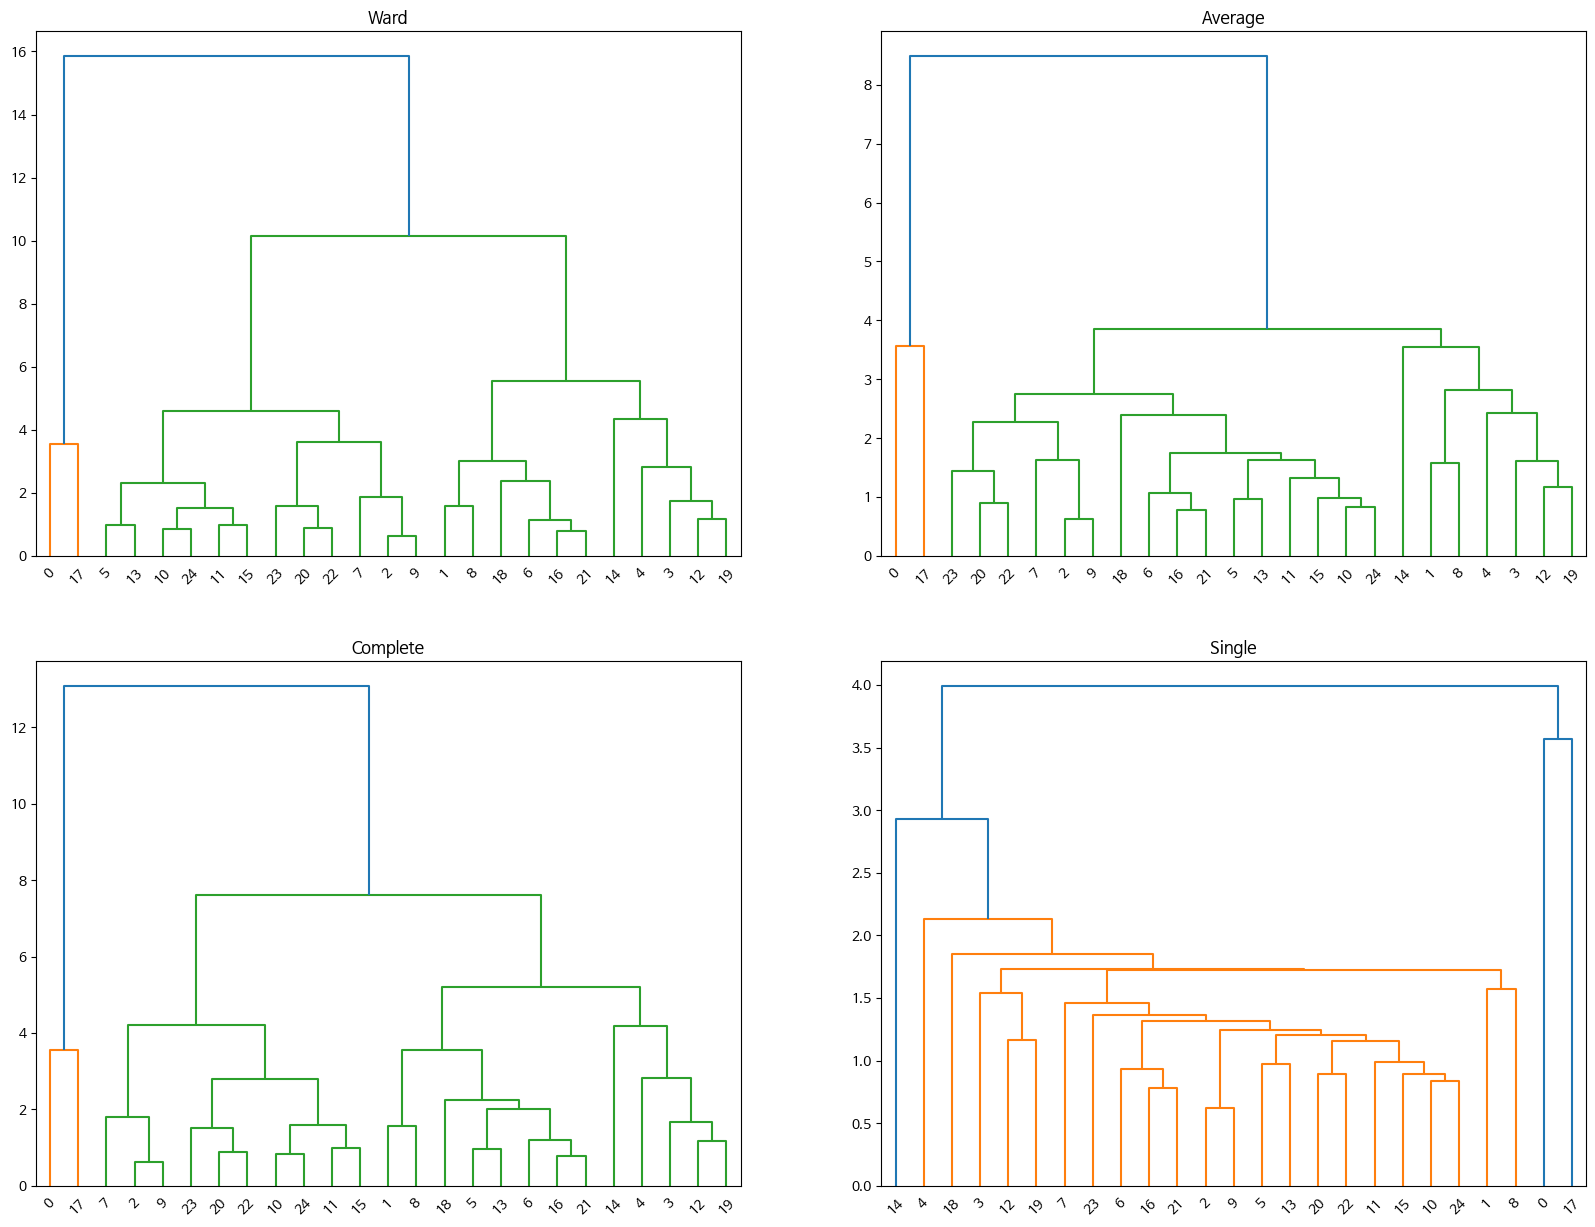

In [ ]:
### 필요한 라이브러리 준비
import scipy
import scipy.cluster.hierarchy as sch

### dendrogram 그리기
fig = plt.figure(figsize=(20, 15))

ax1 = fig.add_subplot(2,2,1)
ax1.set_title('Ward')
link1 = sch.linkage(fish_std.iloc[:,1:],method = 'ward')
dend1 = sch.dendrogram(link1)

ax2 = fig.add_subplot(2,2,2)
ax2.set_title('Average')
link2 = sch.linkage(fish_std.iloc[:,1:],method = 'average')
dend2 = sch.dendrogram(link2)

ax3 = fig.add_subplot(2,2,3)
ax3.set_title('Complete')
link3 = sch.linkage(fish_std.iloc[:,1:],method = 'complete')
dend3 = sch.dendrogram(link3)

ax4 = fig.add_subplot(2,2,4)
ax4.set_title('Single')
link4 = sch.linkage(fish_std.iloc[:,1:],method = 'single')
dend4 = sch.dendrogram(link4)

plt.show()

- **ward 연결법**이 군집을 가장 잘 군집을 잘 분류한다고 판단된다.

### **4-2. 병합 군집 수행**
- **ward** 병합 방식 활용
- 군집의 개수를 **2개**로 설정

In [ ]:
### 필요한 라이브러리 import
from sklearn.cluster import AgglomerativeClustering

### 군집화(병합 군집)
agg = AgglomerativeClustering(n_clusters = 2, linkage = "ward")
cluster_labels = agg.fit_predict(fish_std.iloc[:,1:])
print('cluster labels 유형: ',np.unique(cluster_labels))

cluster labels 유형:  [0 1]


In [ ]:
### 각 행정구가 어느 군집에 속하는지 확인

fish_std['cluster'] = cluster_labels
print(cluster_labels)
print()
print(len(cluster_labels))

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]

25


In [ ]:
### 군집화 결과 확인

df_result = fish_std.groupby(['cluster'])['행정구'].count()
print(df_result)

cluster
0    23
1     2
Name: 행정구, dtype: int64


In [ ]:
### 차원 축소
# PCA를 이용해 10개의 속성을 2개로 차원 축소
# 이후 X좌표, Y좌표로 개별 데이터를 표현

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_transformed = pca.fit_transform(fish_std.iloc[:,1:11])

fish_std['pca_x'] = pca_transformed[:,0]
fish_std['pca_y'] = pca_transformed[:,1]
fish_std.head(3)

,행정구,총생활인구수_평일,10대 생활인구_평일,20~30대 생활인구_평일,40~50대 생활인구_평일,총생활인구수_주말,10대 생활인구_주말,20~30대 생활인구_주말,40~50대 생활인구_주말,평균소득금액,역(전체),cluster,pca_x,pca_y
0,강남구,3.062619,2.712098,3.268715,3.181312,2.343754,2.824073,2.213155,2.483935,3.471040,2.580687,1,8.850706,0.982547
1,강동구,0.517866,0.829095,-0.182534,0.506621,0.773531,0.762698,0.127472,0.873712,0.379982,-0.577496,0,1.361890,-1.223973
2,강북구,-0.989331,-0.762504,-1.235463,-0.949656,-0.862564,-0.729229,-1.181038,-0.798653,-0.839563,-0.727886,0,-2.872108,-0.349406


c:\users\doroc\appdata\local\programs\python\python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


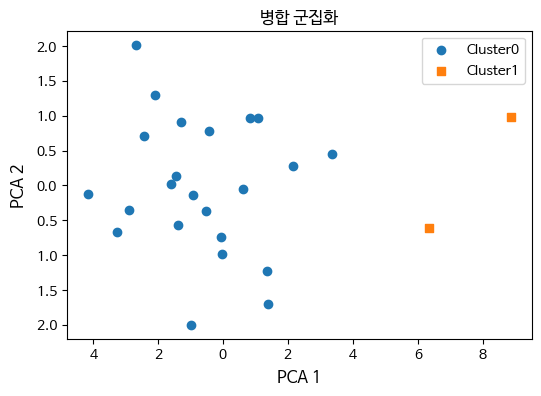

In [ ]:
### 군집별 산점도 출력

# 군집 값이 0, 1인 경우마다 별도의 인덱스로 추출
marker0_ind = fish_std[fish_std['cluster'] == 0].index
marker1_ind = fish_std[fish_std['cluster'] == 1].index

# 군집 값 0, 1에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. 마커 표시
plt.figure(figsize = (6,4))

plt.scatter(x = fish_std.loc[marker0_ind,'pca_x'],y = fish_std.loc[marker0_ind,'pca_y'],marker='o')
plt.scatter(x = fish_std.loc[marker1_ind,'pca_x'],y = fish_std.loc[marker1_ind,'pca_y'], marker='s')

plt.legend(['Cluster0','Cluster1'],fontsize = 10)
plt.xlabel('PCA 1',size = 12)
plt.ylabel('PCA 2',size = 12)
plt.title('병합 군집화')
plt.show()

In [ ]:
### 각 군집에 해당하는 행정구 확인하기

group0 = list(fish_std.loc[fish_std['cluster'] == 0,'행정구'])
print("군집0: "+ str(group0))

group1 = list(fish_std.loc[fish_std['cluster'] == 1,'행정구'])
print("군집1: "+ str(group1))

군집0: ['강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']
군집1: ['강남구', '송파구']


### **4-3. 군집화 평가**

### **a) 실루엣 계수**

In [ ]:
### 모든 개별 데이터에 실루엣 계수값 구하기
score_samples = silhouette_samples(fish_std.iloc[:,1:11],fish_std['cluster'])

### 모든 데이터의 평균 실루엣 계수값 구하기
average_score = silhouette_score(fish_std.iloc[:,1:11],fish_std['cluster'])
print("실루엣 분석 점수: {0:.3f}".format(average_score))

### 실루엣 계수 컬럼 추가
fish_std['silhouette_coef'] = score_samples

### 군집별로 실루엣 계수의 평균값 구하기
fish_std.groupby('cluster')['silhouette_coef'].mean()

실루엣 분석 점수: 0.617


cluster
0    0.621552
1    0.570574
Name: silhouette_coef, dtype: float64

- 개별 군집의 실루엣 계수 평균값이 전체 실루엣 계수의 평균값에서 크게 벗어나지 않는다.
- 전체 실루엣 계수의 평균값은 **0.617**로 높은 편이다.
> 좋은 군집화이다.

### **b) Davies Bouldin Index**

In [ ]:
### Davies Bouldin Index 값 구하기

dbi = davies_bouldin_score(fish_std.iloc[:,1:11],fish_std['cluster'])
print("Davies Bouldin Index: {0:.3f}".format(dbi))

Davies Bouldin Index: 0.464


# **5. GMM(Gaussian Mixture Model)**
- 데이터가 여러 개의 가우시안 분포를 가진 데이터 집합들이 섞여서 생성된 것이라는 가정 하에 군집화를 수행하는 방식
- 섞인 데이터 분포에서 개별 유형의 가우시안 추출 -> 개별 데이터가 이 중 어떤 정규분포에 속하는지 결정
- 모수 추정: 개별 정규분포의 평균/분산 + 각 데이터가 어떤 정규 분포에 해당되는지의 확률
- **확률** 기반 군집화

In [ ]:
### 필요한 라이브러리 import

from sklearn.mixture import GaussianMixture

In [ ]:
### 데이터 다시 준비

feature_df = df_fish.iloc[:,1:]

scaler = StandardScaler()
fish_std = pd.DataFrame(scaler.fit_transform(feature_df),columns = feature_df.columns)

# 결과 확인을 위해 행정구 컬럼 결합하기
fish_std = pd.concat([pd.DataFrame(df_fish['행정구']),fish_std],axis = 1)
fish_std.head(3)

,행정구,총생활인구수_평일,10대 생활인구_평일,20~30대 생활인구_평일,40~50대 생활인구_평일,총생활인구수_주말,10대 생활인구_주말,20~30대 생활인구_주말,40~50대 생활인구_주말,평균소득금액,역(전체)
0,강남구,3.062619,2.712098,3.268715,3.181312,2.343754,2.824073,2.213155,2.483935,3.471040,2.580687
1,강동구,0.517866,0.829095,-0.182534,0.506621,0.773531,0.762698,0.127472,0.873712,0.379982,-0.577496
2,강북구,-0.989331,-0.762504,-1.235463,-0.949656,-0.862564,-0.729229,-1.181038,-0.798653,-0.839563,-0.727886


### **5-1. 군집 개수 선택**
- 가우시안 혼합에서는 클러스터가 타원형이며 크기가 다르므로 관성(이너셔)이나 실루엣 점수를 사용하기 힘듦  
- 대신, BIC나 AIC와 같은 **이론적 정보 기준**을 최소화하는 모델을 찾음  
    - BIC = $log(m)p-2log(\hat{L})$  
    - AIC = $2p-2log(\hat{L})$  
        - m: 샘플의 개수  
        - p: 모델이 학습할 파라미터의 개수  
        - L_hat: 모델의 가능도 함수의 최댓값  
- BIC와 AIC 모두 학습할 파라미터가 **많은(= 군집 개수가 많은)** 모델에게 벌칙을 가하고 데이터에 잘 학습하는 모델에게 보상을 더함
- BIC와 AIC는 종종 동일한 모델을 선택함
    - 둘의 선택이 다른 경우 BIC가 선택한 모델이 AIC가 선택한 모델보다 간단한(=파라미터가 적은) 경향이 있음
- 데이터가 아주 잘 맞지 않을 수 있다.(특히 대규모 데이터셋에서)

c:\users\doroc\appdata\local\programs\python\python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


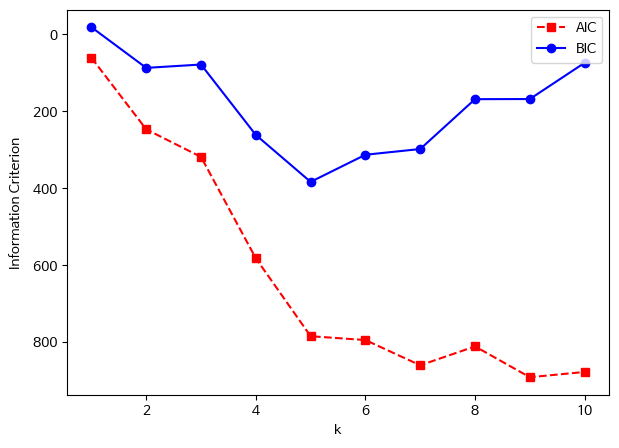

In [ ]:
### AIC,BIC
# 군집 개수(k)를 1 ~ 10까지 조정하며 적정 클러스터 개수 찾기

gmm_per_k = [GaussianMixture(n_components = k, n_init = 10, random_state = 0).fit(fish_std.iloc[:,1:]) for k in range(1,11)]

bics = [model.bic(fish_std.iloc[:,1:]) for model in gmm_per_k] # 모델별 bic
aics = [model.aic(fish_std.iloc[:,1:]) for model in gmm_per_k] # 모댈별 aic

plt.figure(figsize = (7,5))
plt.plot(range(1,11),aics,'rs--')
plt.plot(range(1,11),bics,'bo-')
plt.xlabel('k')
plt.ylabel('Information Criterion')
plt.legend(['AIC','BIC'])
plt.show()

- **k = 5**가 최선의 선택으로 보인다.

### **5-2. GMM 군집화 진행**

In [ ]:
### 군집화 수행

gmm = GaussianMixture(n_components = 5, random_state = 0).fit(fish_std.iloc[:,1:])
gmm_cluster_labels = gmm.predict(fish_std.iloc[:,1:])
print('cluster labels 유형: ',np.unique(gmm_cluster_labels))

cluster labels 유형:  [0 1 2 3 4]


In [ ]:
### 각 행정구가 어느 군집에 속하는지 확인

fish_std['cluster'] = gmm_cluster_labels
print(gmm_cluster_labels)
print()
print(len(gmm_cluster_labels))

[3 0 1 0 0 1 0 1 0 1 4 4 0 1 2 4 0 3 1 0 4 0 4 4 4]

25


In [ ]:
### 군집화 결과 확인

df_result = fish_std.groupby(['cluster'])['행정구'].count()
print(df_result)

cluster
0    9
1    6
2    1
3    2
4    7
Name: 행정구, dtype: int64


In [ ]:
### 차원 축소
# PCA를 이용해 10개의 속성을 2개로 차원 축소
# 이후 X좌표, Y좌표로 개별 데이터를 표현

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_transformed = pca.fit_transform(fish_std.iloc[:,1:11])

fish_std['pca_x'] = pca_transformed[:,0]
fish_std['pca_y'] = pca_transformed[:,1]
fish_std.head(3)

,행정구,총생활인구수_평일,10대 생활인구_평일,20~30대 생활인구_평일,40~50대 생활인구_평일,총생활인구수_주말,10대 생활인구_주말,20~30대 생활인구_주말,40~50대 생활인구_주말,평균소득금액,역(전체),cluster,pca_x,pca_y
0,강남구,3.062619,2.712098,3.268715,3.181312,2.343754,2.824073,2.213155,2.483935,3.471040,2.580687,3,8.850706,0.982547
1,강동구,0.517866,0.829095,-0.182534,0.506621,0.773531,0.762698,0.127472,0.873712,0.379982,-0.577496,0,1.361890,-1.223973
2,강북구,-0.989331,-0.762504,-1.235463,-0.949656,-0.862564,-0.729229,-1.181038,-0.798653,-0.839563,-0.727886,1,-2.872108,-0.349406


c:\users\doroc\appdata\local\programs\python\python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


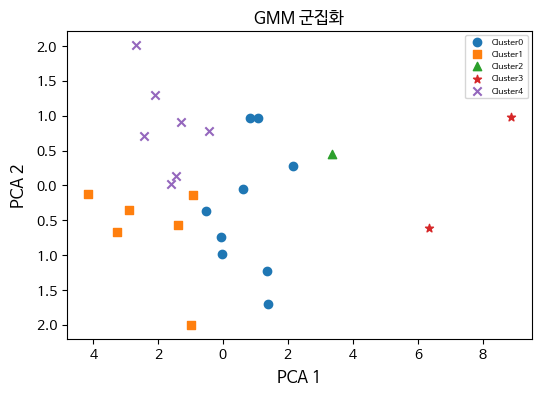

In [ ]:
### 군집별 산점도 출력

# 군집 값이 0, 1, 2,3,4인 경우마다 별도의 인덱스로 추출
marker0_ind = fish_std[fish_std['cluster'] == 0].index
marker1_ind = fish_std[fish_std['cluster'] == 1].index
marker2_ind = fish_std[fish_std['cluster'] == 2].index
marker3_ind = fish_std[fish_std['cluster'] == 3].index
marker4_ind = fish_std[fish_std['cluster'] == 4].index

# 군집 값 0, 1, 2, 3,4에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. 마커 표시
plt.figure(figsize = (6,4))

plt.scatter(x = fish_std.loc[marker0_ind,'pca_x'],y = fish_std.loc[marker0_ind,'pca_y'],marker='o')
plt.scatter(x = fish_std.loc[marker1_ind,'pca_x'],y = fish_std.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x = fish_std.loc[marker2_ind,'pca_x'],y = fish_std.loc[marker2_ind,'pca_y'], marker='^')
plt.scatter(x = fish_std.loc[marker3_ind,'pca_x'],y = fish_std.loc[marker3_ind,'pca_y'], marker='*')
plt.scatter(x = fish_std.loc[marker4_ind,'pca_x'],y = fish_std.loc[marker4_ind,'pca_y'], marker='x')

plt.legend(['Cluster0','Cluster1','Cluster2','Cluster3','Cluster4'],fontsize = 6)
plt.xlabel('PCA 1',size = 12)
plt.ylabel('PCA 2',size = 12)
plt.title('GMM 군집화')
plt.show()

In [ ]:
### 각 군집에 해당하는 행정구 확인하기

group0 = list(fish_std.loc[fish_std['cluster'] == 0,'행정구'])
print("군집0: "+ str(group0))

group1 = list(fish_std.loc[fish_std['cluster'] == 1,'행정구'])
print("군집1: "+ str(group1))

group2 = list(fish_std.loc[fish_std['cluster'] == 2,'행정구'])
print("군집2: "+ str(group2))

group3 = list(fish_std.loc[fish_std['cluster'] == 3,'행정구'])
print("군집3: "+ str(group3))

group4 = list(fish_std.loc[fish_std['cluster'] == 4,'행정구'])
print("군집4: "+ str(group4))

군집0: ['강동구', '강서구', '관악구', '구로구', '노원구', '마포구', '성북구', '영등포구', '은평구']
군집1: ['강북구', '광진구', '금천구', '도봉구', '서대문구', '양천구']
군집2: ['서초구']
군집3: ['강남구', '송파구']
군집4: ['동대문구', '동작구', '성동구', '용산구', '종로구', '중구', '중랑구']


### **5-3. 군집화 평가**

- 가우시안 혼합에서는 클러스터가 타원형이며 크기가 다르므로 관성(이너셔)이나 실루엣 점수를 사용하기 힘들다.
    > Davies-Boudlin Index만을 활용

### **Davies Bouldin Index**

In [ ]:
### Davies Bouldin Index 값 구하기

dbi = davies_bouldin_score(fish_std.iloc[:,1:11],fish_std['cluster'])
print("Davies Bouldin Index: {0:.3f}".format(dbi))

Davies Bouldin Index: 0.949


# **6. 베이즈 가우시안 혼합 모델**
- 최적의 군집 수를 자동으로 찾아줌
    - 단, 최적의 군집수보다 큰 수를 n_components에 전달해야 함
    - 즉, 군집에 대한 최소한의 정보를 알고 있다고 가정
- 자동으로 불필요하누 군집을 제거
    - 불필요한 클러스터의 가중치를 0으로 만든다.
- 가우시안 혼합 모델의 경우 타원형 군집에는 잘 작동하지만, 다른 모양을 가진 데이터셋에서는 성능이 좋지 않다.

### **6-1. 베이즈 가우시안 군집화 수행**

In [ ]:
### 필요한 라이브러리 import

from sklearn.mixture import BayesianGaussianMixture

In [ ]:
### 데이터 다시 준비

feature_df = df_fish.iloc[:,1:]

scaler = StandardScaler()
fish_std = pd.DataFrame(scaler.fit_transform(feature_df),columns = feature_df.columns)

# 결과 확인을 위해 행정구 컬럼 결합하기
fish_std = pd.concat([pd.DataFrame(df_fish['행정구']),fish_std],axis = 1)
fish_std.head(3)

,행정구,총생활인구수_평일,10대 생활인구_평일,20~30대 생활인구_평일,40~50대 생활인구_평일,총생활인구수_주말,10대 생활인구_주말,20~30대 생활인구_주말,40~50대 생활인구_주말,평균소득금액,역(전체)
0,강남구,3.062619,2.712098,3.268715,3.181312,2.343754,2.824073,2.213155,2.483935,3.471040,2.580687
1,강동구,0.517866,0.829095,-0.182534,0.506621,0.773531,0.762698,0.127472,0.873712,0.379982,-0.577496
2,강북구,-0.989331,-0.762504,-1.235463,-0.949656,-0.862564,-0.729229,-1.181038,-0.798653,-0.839563,-0.727886


In [ ]:
### 군집화 수행

bgm = BayesianGaussianMixture(n_components = 25, n_init = 10,random_state = 0)
bgm.fit(fish_std.iloc[:,1:])
print(np.round(bgm.weights_,2))

# 최적 클러스터 개수 확인
n_clusters_ = (np.round(bgm.weights_,2) > 0).sum()
n_clusters_

[0.08 0.07 0.07 0.1  0.06 0.06 0.06 0.05 0.05 0.05 0.05 0.04 0.04 0.04
 0.03 0.03 0.03 0.02 0.02 0.02 0.01 0.01 0.01 0.   0.  ]


23

- 군집이 **23개**로 너무 세분화되는 것을 확인할 수 있다.
- 이하 생략..

# **7. DBSCAN**
- Density-Based Spatial Clustering of Applications with Noise의 약자
- 특정 공간 내의 데이터의 **밀도** 차이를 기반으로 군집화를 수행하는 알고리즘
    - 입실론 주변 영역의 최소 데이터 개수를 포함하는 밀도 기준을 충족시키는 데이터인 핵심 포인트를 연결하면서 군집화를 구성하는 방식
- 간단하고 직관적인 알고리즘
- 데이터의 분포가 기하학적으로 복잡한 데이터 세트에도 효과적인 군집화가 가능함

### **✔ 중요 파라미터**
- 입실론 주변 영역(epsilon): 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역
- 최소 데이터 개수(min points): 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 개수

### **✔ 데이터 포인트**
- 핵심 포인트(Core Point): 주변 영역 내에 최소 데이터 개수 이상의 타 데이터를 가지고 있을 경우
- 이웃 포인트(Neighbor Point): 주변 영역 내에 위치한 타 데이터
- 경계 포인트(Border Point): 주변 영역 내에 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않지만 핵심 포인트를 이웃 포인트로 가지고 있는 데이터
- 잡음 포인트(Noise Point): 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않으며, 핵심 포인트도 이웃 포인트로 가지고 있지 않는 데이터

### **7-1. 최적 파라미터 탐색**
- eps와 min points는 **k-dist**를 통해 적절한 값이 결정됨
- 각 데이터마다 k번째로 가까운 거리를 구하고, 이 거리를 정렬하여 plot을 그린다.
    - 이때, 급격히 k-dist가 증가할 때의 dist값이 eps, k가 min points가 된다.  
    (이렇게 되면 대부분의 경우 eps 반경 내에 k개의 데이터를 갖고 있다는 의미)


In [ ]:
### 필요한 라이브러리 import

from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [ ]:
### 데이터 다시 준비

feature_df = df_fish.iloc[:,1:]

scaler = StandardScaler()
fish_std = pd.DataFrame(scaler.fit_transform(feature_df),columns = feature_df.columns)

# 결과 확인을 위해 행정구 컬럼 결합하기
fish_std = pd.concat([pd.DataFrame(df_fish['행정구']),fish_std],axis = 1)
fish_std.head(3)

,행정구,총생활인구수_평일,10대 생활인구_평일,20~30대 생활인구_평일,40~50대 생활인구_평일,총생활인구수_주말,10대 생활인구_주말,20~30대 생활인구_주말,40~50대 생활인구_주말,평균소득금액,역(전체)
0,강남구,3.062619,2.712098,3.268715,3.181312,2.343754,2.824073,2.213155,2.483935,3.471040,2.580687
1,강동구,0.517866,0.829095,-0.182534,0.506621,0.773531,0.762698,0.127472,0.873712,0.379982,-0.577496
2,강북구,-0.989331,-0.762504,-1.235463,-0.949656,-0.862564,-0.729229,-1.181038,-0.798653,-0.839563,-0.727886


**✔ Eps 구하기**

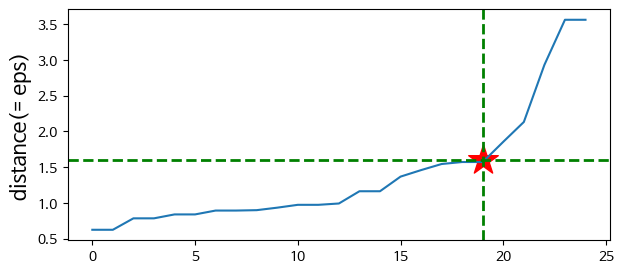

In [ ]:
### K-dist 계산
# 유클리디안(euclidean) 거리

neigh = NearestNeighbors(n_neighbors = 2) # 두 개의 데이터, 1개의 거리
nbrs = neigh.fit(fish_std.iloc[:,1:])
# 각 개체마다 거리를 계산해서 거리와 그 떄의 index 반환
distances, indices = nbrs.kneighbors(fish_std.iloc[:,1:]) 
# 거리 정렬
distances = np.sort(distances, axis = 0)
distances = distances[:,1]

### Plotting
plt.figure(figsize = (7,3))
plt.plot(distances)
plt.axvline(x = 19, color = 'g', lw = 2, ls='--')
plt.axhline(y = 1.6, color = 'g', lw = 2, ls='--')
plt.scatter(19,1.6,marker = '*',color = 'r',s = 500)
plt.ylabel('distance(= eps)',fontsize = 15)
plt.show()

- 급격히 dist가 증가한 지점의 distance인 **1.6**을 **eps**로 설정

### **7-2. DBSCAN 군집화 수행**

- eps = 1.6
- min_points를 2로 설정
- min_sample = 3(min points + 1)

In [ ]:
### DBSCAN 군집화 수행

dbscan = DBSCAN(eps = 1.6, min_samples = 3, metric = 'euclidean')
dbscan_labels = dbscan.fit_predict(fish_std.iloc[:,1:])
print('cluster labels 유형: ',np.unique(dbscan_labels))

cluster labels 유형:  [-1  0  1]


- 2개의 군집으로 분류되는 것을 확인할 수 있다.
- 잡음 포인트(cluster = -1)가 존재

In [ ]:
### 각 행정구가 어느 군집에 속하는지 확인

fish_std['cluster'] = dbscan_labels
print(dbscan_labels)
print()
print(len(dbscan_labels))

[-1 -1  0  1 -1  0  0  0 -1  0  0  0  1  0 -1  0  0 -1 -1  1  0  0  0  0
  0]

25


In [ ]:
### 군집화 결과 확인

df_result = fish_std.groupby(['cluster'])['행정구'].count()
print(df_result)

cluster
-1     7
 0    15
 1     3
Name: 행정구, dtype: int64


In [ ]:
### 차원 축소
# PCA를 이용해 10개의 속성을 2개로 차원 축소
# 이후 X좌표, Y좌표로 개별 데이터를 표현

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_transformed = pca.fit_transform(fish_std.iloc[:,1:11])

fish_std['pca_x'] = pca_transformed[:,0]
fish_std['pca_y'] = pca_transformed[:,1]
fish_std.head(3)

,행정구,총생활인구수_평일,10대 생활인구_평일,20~30대 생활인구_평일,40~50대 생활인구_평일,총생활인구수_주말,10대 생활인구_주말,20~30대 생활인구_주말,40~50대 생활인구_주말,평균소득금액,역(전체),cluster,pca_x,pca_y
0,강남구,3.062619,2.712098,3.268715,3.181312,2.343754,2.824073,2.213155,2.483935,3.471040,2.580687,-1,8.850706,0.982547
1,강동구,0.517866,0.829095,-0.182534,0.506621,0.773531,0.762698,0.127472,0.873712,0.379982,-0.577496,-1,1.361890,-1.223973
2,강북구,-0.989331,-0.762504,-1.235463,-0.949656,-0.862564,-0.729229,-1.181038,-0.798653,-0.839563,-0.727886,0,-2.872108,-0.349406


c:\users\doroc\appdata\local\programs\python\python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


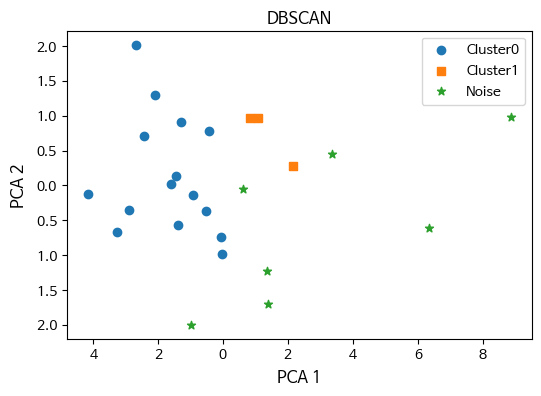

In [ ]:
### 군집별 산점도 출력

# 군집 값이 -1, 0, 1인 경우마다 별도의 인덱스로 추출
marker0_ind = fish_std[fish_std['cluster'] == 0].index
marker1_ind = fish_std[fish_std['cluster'] == 1].index
noise_ind = fish_std[fish_std['cluster'] == -1].index

# 군집 값 0, 1, 2, 3에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. 마커 표시
plt.figure(figsize = (6,4))

plt.scatter(x = fish_std.loc[marker0_ind,'pca_x'],y = fish_std.loc[marker0_ind,'pca_y'],marker='o')
plt.scatter(x = fish_std.loc[marker1_ind,'pca_x'],y = fish_std.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x = fish_std.loc[noise_ind,'pca_x'],y = fish_std.loc[noise_ind,'pca_y'], marker='*')

plt.legend(['Cluster0','Cluster1','Noise'],fontsize = 10)
plt.xlabel('PCA 1',size = 12)
plt.ylabel('PCA 2',size = 12)
plt.title('DBSCAN')
plt.show()

In [ ]:
### 각 군집에 해당하는 행정구 확인하기

group0 = list(fish_std.loc[fish_std['cluster'] == 0,'행정구'])
print("군집0: "+ str(group0))

group1 = list(fish_std.loc[fish_std['cluster'] == 1,'행정구'])
print("군집1: "+ str(group1))

noise = list(fish_std.loc[fish_std['cluster'] == -1,'행정구'])
print("Noise: "+ str(noise))

군집0: ['강북구', '광진구', '구로구', '금천구', '도봉구', '동대문구', '동작구', '서대문구', '성동구', '성북구', '용산구', '은평구', '종로구', '중구', '중랑구']
군집1: ['강서구', '마포구', '영등포구']
Noise: ['강남구', '강동구', '관악구', '노원구', '서초구', '송파구', '양천구']


- 전체 25개의 구 중 **7개**의 구가 noise이다.

### **7-3. 군집화 평가**

### **a) 실루엣 계수**

In [ ]:
### 모든 개별 데이터에 실루엣 계수값 구하기
score_samples = silhouette_samples(fish_std.iloc[:,1:11],fish_std['cluster'])

### 모든 데이터의 평균 실루엣 계수값 구하기
average_score = silhouette_score(fish_std.iloc[:,1:11],fish_std['cluster'])
print("실루엣 분석 점수: {0:.3f}".format(average_score))

### 실루엣 계수 컬럼 추가
fish_std['silhouette_coef'] = score_samples

### 군집별로 실루엣 계수의 평균값 구하기
fish_std.groupby('cluster')['silhouette_coef'].mean()

실루엣 분석 점수: 0.202


cluster
-1   -0.257291
 0    0.342586
 1    0.569386
Name: silhouette_coef, dtype: float64

### **b) Davies Bouldin Index**

In [ ]:
### Davies Bouldin Index 값 구하기

dbi = davies_bouldin_score(fish_std.iloc[:,1:11],fish_std['cluster'])
print("Davies Bouldin Index: {0:.3f}".format(dbi))

Davies Bouldin Index: 1.480


# **8. 결과 정리**

- 군집화 평가 시 실루엣 점수와 Davies bouldin score를 활용함
- 실루엣 점수는 **높을수록**(0.5 이상 권장), Davies bouldin score는 **낮을수록** 좋은 군집화이다.

In [ ]:
result = [['K-Means',0.272,1.007],
         ['평균 이동',0.287,0.605],
         ['병합 군집',0.617,0.464],
         ['GMM','-',0.949],
         ['베이즈 가우시안','-','-'],
         ['DBSCAN',0.202,1.48]]
cols = ['Algorithm','실루엣 점수','DBI']
result_df = pd.DataFrame(result,columns = cols)
result_df.sort_values(by = ['실루엣 점수','DBI'],ascending = [False, True]).reset_index(drop = True)

,Algorithm,실루엣 점수,DBI
0,GMM,-,0.949
1,베이즈 가우시안,-,-
2,병합 군집,0.617,0.464
3,평균 이동,0.287,0.605
4,K-Means,0.272,1.007
5,DBSCAN,0.202,1.48


- 병합 군집 방식과 GMM이 좋은 군집화 방법이라고 볼 수 있다.

### **a) 병합 군집**

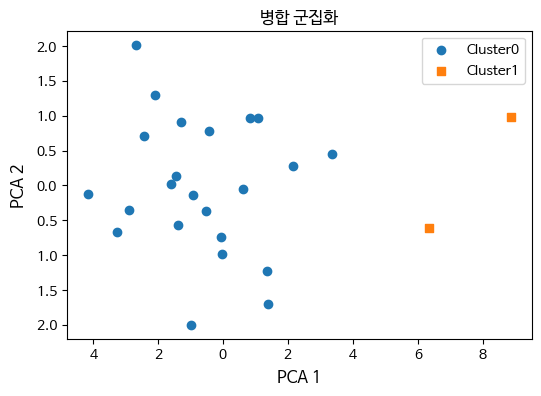

- **군집0**: ['강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']
- **군집1**: ['강남구', '송파구']

- 대체적으로 군집은 **총생활인구수**에 비례하여 형성되는 것을 확인할 수 있다.
    - 총생활인구수(평일): 군집1 > 군집0
    - 총생활인구수(주말): 군집1 > 군집0
    - 평일, 주말 모두 총생활인구수가 다른 지역에 비해 **1.5배** 정도 더 많다. 
- **군집1**
    - 평일과 주말 모두 총생활인구수가 많은 지역들이고,각 연령대 별 총생활인구수 또한 다른 지역들에 비해 많다.
    - 평균소득금액이 비교적 높은 지역들이다. 
    - 구에 존재하는 전체 지하철역 개수가 비교적 많은 지역들이다.

### **b) GMM** 

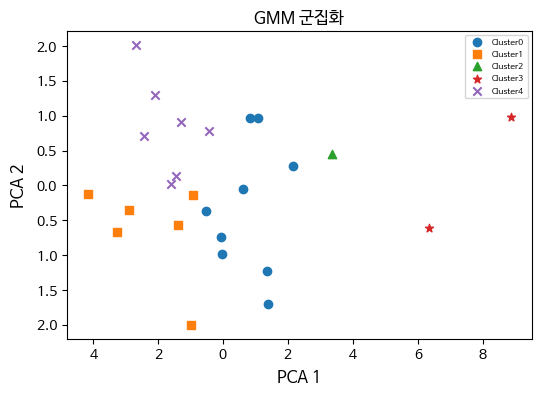

- **군집0**: ['강동구', '강서구', '관악구', '구로구', '노원구', '마포구', '성북구', '영등포구', '은평구']
- **군집1**: ['강북구', '광진구', '금천구', '도봉구', '서대문구', '양천구']
- **군집2**: ['서초구']
- **군집3**: ['강남구', '송파구']
- **군집4**: ['동대문구', '동작구', '성동구', '용산구', '종로구', '중구', '중랑구']

- 대체적으로 군집은 **총생활인구수**에 비례하여 형성되는 것을 확인할 수 있다.
    - 총생활인구수(평일): 군집3 >> 군집2 > 군집0 > 군집1 ≒ 군집4 
    - 총생활인구수(주말): 군집3 >>> 군집2 > 군집0 > 군집1 ≒ 군집4
- **군집0**  
    - 평일과 주말 모두 총생활인구수는 **중간** 정도인 지역들이다.
    - 두드러지는 특징은 없는 지역들이다.
- **군집1**
    - 평일과 주말 모두 총생활인구수가 **적은** 지역들이다.
    - 지하철역 전체 개수가 **가장 적은** 지역들이다.
- **군집2**  
    - 평일과 주말 모두 총생활인구수가 **많은** 지역이다.(2위)
    - 평균소득금액이 두번째로 **높은** 지역이다.
- **군집3**     
    - 평일과 주말 모두 총생활인구가 **가장 많은** 지역들이다.
    - 평균소득금액이 **가장 높은** 지역들이다.
    - 지하철역 전체 개수가 **가장 많은** 지역들이다.
- **군집4**  
    - 평일과 주말 모두 총생활인구수가 **적은** 지역들이다.
    - 지하철역 전체 개수가 비교적 **많은** 지역들이다.